### Evolving Network Analysis - January 2018
#### <i>Abdel K. Bokharouss, Joris Rombouts, Bart van Helvert, Remco Surtel</i>

#### Imports, preparation, and creating the graph

In [52]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("./data/tgraph_real_wikiedithyperlinks.txt") as file:
    peek = file.readlines()[:10]
peek

['1 6 1028243088 1120917090\n',
 '1 8 1029885647 1136791625\n',
 '1 9 1029885647 1136791625\n',
 '1 3 1028243088 1143227562\n',
 '1 3 1146727453 1148998304\n',
 '1 5 1028243088 1184096745\n',
 '1 2 1028243088 1184096745\n',
 '1 3 1149598035 1184096745\n',
 '1 4 1028243088 1184096745\n',
 '1 7 1028243088 1184096745\n']

In [3]:
# Create a dataframe from the given textfile. This dataframe will be used to create a static graph G.
df_G = pd.read_table("./Data/tgraph_real_wikiedithyperlinks.txt", header = None, sep = " ",
                       names = ["src", "trg", "start", "end"])

In [4]:
df_G.head()

,src,trg,start,end
0,1,6,1028243088,1120917090
1,1,8,1029885647,1136791625
2,1,9,1029885647,1136791625
3,1,3,1028243088,1143227562
4,1,3,1146727453,1148998304


In [5]:
# Initialize a static graph G from the given pandas dataframe.
G = nx.from_pandas_dataframe(df_G, 'src', 'trg', edge_attr=None, create_using=nx.DiGraph())

## The HITS algorithm
#### (Hyperlink-Induced Topic Search; also known as hubs and authorities)

In [6]:
# Run the HITS algorithm from networkx.
# Returns two-tuple of dictionaries: (hubs, authorities).
HITS = nx.hits(G)

In [95]:
hubs = HITS[0]
authorities = HITS[1]

Creating a DataFrame with the hub- and authority-values:

In [31]:
df_hubs = pd.DataFrame.from_dict(hubs, orient='index')
df_hubs.columns = ['Hub values']
df_hubs['Node'] = df_hubs.index
cols = df_hubs.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_hubs = df_hubs[cols]
df_hubs.head()

,Node,Hub values
1,1,3.234513e-05
6,6,0.000000e+00
8,8,3.201468e-07
9,9,1.242623e-04
3,3,5.658371e-05


In [32]:
df_auth = pd.DataFrame.from_dict(authorities, orient='index')
df_auth.columns = ['Authority values']
df_auth['Node'] = df_auth.index
cols = df_auth.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_auth = df_auth[cols]
df_auth.head()

,Node,Authority values
1,1,0.000018
6,6,0.000008
8,8,0.000017
9,9,0.000929
3,3,0.000416


In [34]:
df_HITS = pd.merge(df_hubs, df_auth, on='Node')
df_HITS.head()

,Node,Hub values,Authority values
0,1,3.234513e-05,0.000018
1,6,0.000000e+00,0.000008
2,8,3.201468e-07,0.000017
3,9,1.242623e-04,0.000929
4,3,5.658371e-05,0.000416


Saving the DataFrame to a CSV file, and importing the CSV file again, so we don't have to re-run the algorithm. (It takes a long time!)

In [39]:
# Save the DataFrame to a CSV file so we don't have to run the HITS algorithm ever again
df_HITS.to_csv('./Data/HITS.csv')

In [40]:
df_HITS = pd.DataFrame.from_csv('./Data/HITS.csv')
df_HITS.head()

,Node,Hub values,Authority values
0,1,3.234513e-05,0.000018
1,6,0.000000e+00,0.000008
2,8,3.201468e-07,0.000017
3,9,1.242623e-04,0.000929
4,3,5.658371e-05,0.000416


### Analysis

Let's start by looking at the top-10 best hubs and the top-10 best authorities:

In [47]:
df_HITS = df_HITS.sort_values(by=['Hub values'], ascending=False)
df_HITS.head(10)

,Node,Hub values,Authority values
90287,103836,0.000286,1.248908e-05
28270,9261,0.000269,1.550887e-07
694,300,0.000254,3.692231e-03
4720,442,0.000251,3.091208e-03
5763,103662,0.000251,3.153282e-06
782,192,0.000249,1.664368e-04
696,241,0.000249,3.659080e-03
5414,3420,0.000240,3.527216e-04
5472,280,0.000235,1.774726e-04
15681,7541,0.000234,2.023329e-04


In [48]:
df_HITS = df_HITS.sort_values(by=['Authority values'], ascending=False)
df_HITS.head(10)

,Node,Hub values,Authority values
694,300,0.000254,0.003692
696,241,0.000249,0.003659
4710,240,0.000194,0.003568
690,394,0.000200,0.003363
673,149,0.000101,0.003226
4709,126,0.000187,0.003166
4720,442,0.000251,0.003091
4713,249,0.000198,0.003084
693,125,0.000163,0.002904
687,146,0.000000,0.002882


Interestingly, we can see that some nodes appear in both of these top-10s, namely nodes 300, 241, and 442. This indicates that these nodes are both excellent hubs and excellent authorities. Thus, they link to many valuable authority pages, while also being linked to by many valuable hub pages. 

Apart from this, the values themselves don't really indicate anything interesting. So we will try to create some visualizatons to see the distributions of the hub- and authority-values, and their relations to each other, to see if anything interesting is going on.

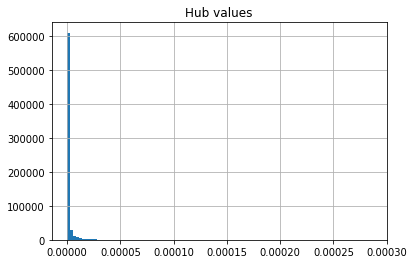

In [90]:
df_HITS.hist(column='Hub values', bins=100)
plt.show()

We can't see much in this graph, so let's take a closer look:

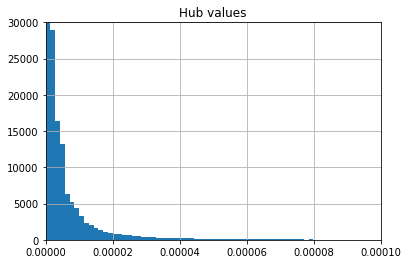

In [87]:
df_HITS.hist(column='Hub values', bins=200)
plt.ylim(0, 30000)
plt.xlim(0, 0.0001)
plt.show()

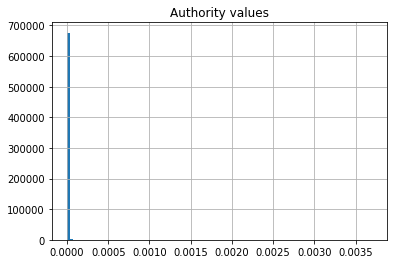

In [72]:
df_HITS.hist(column='Authority values', bins=100)
plt.show()

Again, we take a closer look:

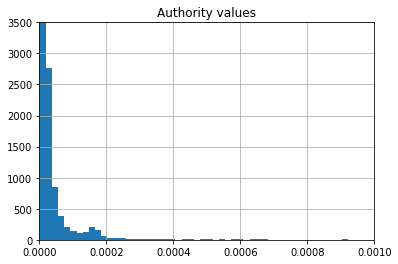

In [83]:
df_HITS.hist(column='Authority values', bins=200)
plt.xlim(0, 0.001)
plt.ylim(0, 3500)
plt.show()

We can see that the distributions for hub- and authority-values are very similar. For both hubs and authorities, there are incredibly many nodes whose values approach (or are) 0. As we get to the higher values, the number of nodes drops extremely quickly. This shows that there are many nodes that aren't linked to any important nodes, and only few nodes that are linked to other important nodes.

Let's create a scatter plot to see how the hub- and authority-values relate to each other.

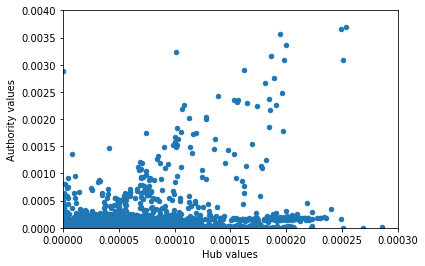

In [92]:
df_HITS.plot(kind='scatter', x='Hub values', y='Authority values', s=20)
plt.xlim(0, 0.0003)
plt.ylim(0, 0.004)
plt.show()

An interesting point shown by this plot is that there aren't many nodes that have authority without being a decent hub. Nodes with a high hub-value that don't have high authority, however, are very common. This shows that it is nearly impossible for a node to have a high authority (i.e. to be linked to by many high-ranking hubs) without having a high hub-value itself (i.e. linking to many pages that have high authority).

However, to be a good hub (i.e. to link to many pages with high authority) it doesn't seem that having a high authority is necessary. 

This shows that it is easy for a node to link to many authorities, while it is far more difficult for a node to be linked to by many hubs.

In terms of the wiki page, this means that when a wiki page is created, it is easy to add links to the wiki page that add to many good wiki pages with a high authority. However, to get this new wiki page linked to by many hubs, would be far more difficult. To achieve this, your wiki page would need to about a subject that is interesting in many other fields, and your wiki page would have to exist for such an amount of time that other wiki pages have the time to add links to it. This is why many hubs without authority exist, while the opposite is very rare.